<a href="https://colab.research.google.com/github/sysphcd/PythonProgrammingforData/blob/main/Projects/Data_Exploration_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# London Housing Data Exploration Project

The context (what is the general subject, why is it important to you?)
A link to more information if this is available online
A description of the story you would like to tell from the data (e.g. visualisation of current and predicted trends, the proportion of each category, a correlation, a prediction from a decision type model, a set of summary statistics, etc)

# Aim

In this mini project, I'll be retrieving data and use some tools to inspect and explore the dataset.  I will be using visualisation to understand more about the data and see if we can find out more insight, the replationshihps within the dataset, predict the trends, and finally summaries my conclusion. 

### What to do
---

Decide what you want to know, explain this in the TEXT cell below, then write some code to get the answer.  When you have done this, add a new text cell below the code cell, explain what you have found.  Then do the same again, adding text cell, code cell, text cell, for something else you would like to know.



**Project** 

- clean, sort and wrangle the data
- remove duplicated data
- Read the dataset into a dataframe, skipping the first row
- Convert dates to date format
- population_size, number_of_jobs no data conver to 0
- Convert population_size, number_of_jobs to integer
- replace mean_salary '-' and '#' to 0 and Convert mean_salary values to float type
- Create a new column for 'date' (use df['date'].dt.year)
- Rename the no_of_houses column to number_of_jobs
- Remove the column if whole column has no data
- Remove rows with nodata in some columns
- reorder columns 
- Sort by 


# About the data

## Data Source

The following data file contains data collected London housing yearly variables. You can see the data in a csv file here: https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/housing_in_london_yearly_variables.csv



## The data contains

*   a heading line which needs to be skipped
*   life_satisfaction column some has no data
*   some number_of_jobs,area_size,no_of_houses column has no data
*   recycling_pct some of them shows 'na'
*   mean_salary some shows '-' and '#'
*   population_size, number_of_jobs has nan value
*   first letter in area need to change to capital.
*   dates need to be converted to dates
*   some duplicates

**All fields**
code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag

**Example:**

E09000002,barking and dagenham,2001-12-01,22323,,26050,3,165654,54000.0,3780,68298,1 E09000020,kensington and chelsea,2018-12-01,32976,7.23,42099,27,156197,164000.0,1238,87611,1

# Data Retrieval

In [103]:
#from google.colab import files
import pandas as pd
import numpy as np
from datetime import datetime

In [104]:
def get_data(url):
  df = pd.read_csv(url) #,skiprows = 1)
  #print(df.columns)
  return df 

#program starts here  
url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/housing_in_london_yearly_variables.csv"
londonhousing_df = get_data(url)  

# Inspect Data

In [105]:
londonhousing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               1071 non-null   object 
 1   area               1071 non-null   object 
 2   date               1071 non-null   object 
 3   median_salary      1049 non-null   float64
 4   life_satisfaction  352 non-null    float64
 5   mean_salary        1071 non-null   object 
 6   recycling_pct      860 non-null    object 
 7   population_size    1018 non-null   float64
 8   number_of_jobs     931 non-null    float64
 9   area_size          666 non-null    float64
 10  no_of_houses       666 non-null    float64
 11  borough_flag       1071 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 100.5+ KB


In [106]:
display(londonhousing_df.head())
display(londonhousing_df.tail())

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
1066,K03000001,great britain,2019-12-01,30446.0,NaN,37603,NaN,NaN,NaN,NaN,NaN,0
1067,K04000001,england and wales,2019-12-01,30500.0,NaN,37865,NaN,NaN,NaN,NaN,NaN,0
1068,N92000002,northern ireland,2019-12-01,27434.0,NaN,32083,NaN,NaN,NaN,NaN,NaN,0
1069,S92000003,scotland,2019-12-01,30000.0,NaN,34916,NaN,NaN,NaN,NaN,NaN,0
1070,W92000004,wales,2019-12-01,27500.0,NaN,31251,NaN,NaN,NaN,NaN,NaN,0


Check if any null values in the dataset.

In [107]:
londonhousing_df.isnull().values.any()

True

# Clean, Sort and Wrangle the data

In [108]:
def process_data(df): 
  #remove duplicated data
  df.drop_duplicates()
  #Convert dates to date format
  df['date'] = pd.to_datetime(df['date'])
  #Capitalise the area values
  df['area']=df.area.str.replace('city of ','')
  df['area'] = df['area'].str.title() #.capitalize()
  #replace nodata to 0 in population_size, number_of_jobs and Convert population_size, number_of_jobs to integer
  df['population_size'] = df['population_size'].fillna(0)
  df['number_of_jobs'] =  df['number_of_jobs'].fillna(0)
  df['population_size'] =  df['population_size'].astype(int)
  df['number_of_jobs'] =  df['number_of_jobs'].astype(int)
  #drop row of population_size if any values is 0
  indexPopulation = df[df['population_size'] == 0].index  
  df.drop(indexPopulation , inplace=True) 
  #remove mean_salary some shows '-' and '#' and Convert mean_salary values to float type
  df.loc[df['mean_salary'] == '-', 'mean_salary'] = 0
  df.loc[df['mean_salary'] == '#', 'mean_salary'] = 0
  df['mean_salary'] = df['mean_salary'].astype(float)
  df['mean_salary'] = df['mean_salary'].fillna(0)
  df['area_size'] = df['area_size'].fillna(0)
  #df.drop(['no_of_houses'],axis=1,inplace=True)
  df['no_of_houses'] = df['no_of_houses'].fillna(0)
  df['no_of_houses'] = df['no_of_houses'].astype(int)
  df['recycling_pct'] = df['recycling_pct'].fillna(0)
  df['life_satisfaction'] = df['life_satisfaction'].fillna(0)
  df['years'] = df['date'].dt.year
  df['sum_salary'] = df['mean_salary']*df['population_size']
  df['code_name'] = df['code'].str[0:1] 
  df.loc[(df.code_name == 'E'),'code_name']='England'
  df.loc[(df.code_name == 'W'),'code_name']='Wales'
  df.loc[(df.code_name == 'N'),'code_name']='Northern Ireland'
  df.loc[(df.code_name == 'S'),'code_name']='Scotland'
  df.loc[(df.code_name == 'K'),'code_name']=df['area']
  #drop areas not England or drop code begin not with 'E'
  indexcodes = df[(df['code'].str[0:1] != 'E')].index
  df.drop(indexcodes , inplace=True) 
  #df.iloc[[0, -1]]
  #reorder columns 
  #df[["Code", "area", "date","median_salary","mean_salary","population_size","area_size","number_of_jobs","no_of_houses","recycling_pct","life_satisfaction","borough_flag"]]
  #Rename the columns
  df = df.rename(columns={'no_of_houses':'number_of_houses'})
  #sort by code and area
  df.sort_values(by = ["code", "area"])
  #df.describe()

  return df


cleaned_data = process_data(londonhousing_df)

What does the data look like now. 

In [109]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 0 to 1013
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   code               898 non-null    object        
 1   area               898 non-null    object        
 2   date               898 non-null    datetime64[ns]
 3   median_salary      879 non-null    float64       
 4   life_satisfaction  898 non-null    float64       
 5   mean_salary        898 non-null    float64       
 6   recycling_pct      898 non-null    object        
 7   population_size    898 non-null    int64         
 8   number_of_jobs     898 non-null    int64         
 9   area_size          898 non-null    float64       
 10  number_of_houses   898 non-null    int64         
 11  borough_flag       898 non-null    int64         
 12  years              898 non-null    int64         
 13  sum_salary         898 non-null    float64       
 14  code_name

In [110]:
display(cleaned_data)

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,number_of_houses,borough_flag,years,sum_salary,code_name
0,E09000001,London,1999-12-01,33020.0,0.00,48922.0,0,6581,0,0.0,0,1,1999,3.219557e+08,England
1,E09000002,Barking And Dagenham,1999-12-01,21480.0,0.00,23620.0,3,162444,0,0.0,0,1,1999,3.836927e+09,England
2,E09000003,Barnet,1999-12-01,19568.0,0.00,23128.0,8,313469,0,0.0,0,1,1999,7.249911e+09,England
3,E09000004,Bexley,1999-12-01,18621.0,0.00,21386.0,18,217458,0,0.0,0,1,1999,4.650557e+09,England
4,E09000005,Brent,1999-12-01,18532.0,0.00,20911.0,6,260317,0,0.0,0,1,1999,5.443489e+09,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,E12000008,South East,2018-12-01,30849.0,7.79,37020.0,47,9133625,4937000,0.0,0,0,2018,3.381268e+11,England
1010,E12000009,South West,2018-12-01,27956.0,7.77,32848.0,50,5599735,3011000,0.0,0,0,2018,1.839401e+11,England
1011,E13000001,Inner London,2018-12-01,42153.0,0.00,59567.0,0,3600203,0,32796.0,1513559,0,2018,2.144533e+11,England
1012,E13000002,Outer London,2018-12-01,31031.0,0.00,37173.0,0,5307878,0,126676.0,2042603,0,2018,1.973097e+11,England


**Create a pivot table**

Pivot tables are useful for summarizing data. They can automatically sort, count, total, or average data stored in one table. Then, they can show the results of those actions in a new table of that summarized data.

In pandas, the pivot_table() function is used to create pivot tables. To construct a pivot table, we’ll first call the DataFrame we want to work with, then the data we want to show, and how they are grouped. 

Pivot tables let us create new tables from existing tables, allowing us to decide how we want that data grouped.

- use each area as columns and each year as index to display population_size

In [111]:
# The function is for creating pivot table. 
def create_pivot_table(df, value_name, index_name, cols_name, aggfunc_cal):
  df_pivot = pd.pivot_table(df, values=value_name, index=[index_name], columns=[cols_name], aggfunc=aggfunc_cal)
  #df = df_pivot.reindex(df_pivot['population_size'].sort_values(by=2012, ascending=False).index)
  return df_pivot


# Index : years,       columns : area,      values : population_size
sum_pivot_table = create_pivot_table(cleaned_data, 'population_size', 'years', 'area',np.sum)
display(sum_pivot_table)

area,Barking And Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,East,East Midlands,...,South East,South West,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,West Midlands,Westminster,Yorkshire And The Humber
years,,,,,,,,,,,,,,,,,,,,,
1999,162444.0,313469.0,217458.0,260317.0,294902.0,190003.0,332066.0,302252.0,5338722.0,4152443.0,...,7955124.0,4880958.0,247853.0,179375.0,193507.0,221057.0,264220.0,5271959.0,189233.0,4956325.0
2000,163893.0,315784.0,218717.0,264945.0,295317.0,196174.0,334241.0,304370.0,5374972.0,4168076.0,...,7990598.0,4917074.0,252726.0,180485.0,197133.0,221296.0,267695.0,5269626.0,196478.0,4958609.0
2001,165654.0,319481.0,218757.0,269620.0,296218.0,202567.0,335112.0,307276.0,5400463.0,4189622.0,...,8023449.0,4943364.0,256712.0,181461.0,201090.0,222015.0,271742.0,5280727.0,203329.0,4976643.0
2002,166357.0,320552.0,219123.0,269871.0,296668.0,203972.0,335415.0,309242.0,5432688.0,4221753.0,...,8045192.0,4976129.0,256269.0,181265.0,207031.0,223776.0,274917.0,5301243.0,208100.0,5000111.0
2003,166210.0,321802.0,220016.0,268323.0,297253.0,204254.0,335919.0,308108.0,5474133.0,4255080.0,...,8087924.0,5006653.0,255242.0,181267.0,208651.0,224115.0,276828.0,5325475.0,211009.0,5026314.0
2004,165610.0,323723.0,220917.0,268335.0,297307.0,207341.0,337134.0,310073.0,5508564.0,4291476.0,...,8133100.0,5038284.0,257257.0,181094.0,211154.0,225002.0,278615.0,5346376.0,214557.0,5063199.0
2005,166275.0,327541.0,222391.0,270939.0,299421.0,211088.0,339052.0,312774.0,5562653.0,4329112.0,...,8202896.0,5086121.0,261811.0,182103.0,213382.0,226747.0,283229.0,5380687.0,223132.0,5108408.0
2006,167157.0,330801.0,223280.0,276504.0,300963.0,211032.0,340449.0,315329.0,5606294.0,4366676.0,...,8270861.0,5119840.0,267553.0,182882.0,218400.0,230731.0,287538.0,5415521.0,222829.0,5134016.0
2007,169031.0,334837.0,224625.0,283273.0,302625.0,211520.0,344029.0,318671.0,5653534.0,4404774.0,...,8351391.0,5170537.0,272626.0,184174.0,225251.0,235665.0,291440.0,5451924.0,220619.0,5164138.0


# Data Analyses

# Visualize Data

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt



Let’s plot the same names but this time as male names:

In [113]:
all_data = cleaned_data.copy()
all_data_index = all_data.set_index(['area', 'years']).sort_index()
all_data_index

code       date  median_salary  \
area                     years                                        
Barking And Dagenham     1999   E09000002 1999-12-01        21480.0   
                         2000   E09000002 2000-12-01        22618.0   
                         2001   E09000002 2001-12-01        22323.0   
                         2002   E09000002 2002-12-01        24813.0   
                         2003   E09000002 2003-12-01        25358.0   
...                                   ...        ...            ...   
Yorkshire And The Humber 2012   E12000003 2012-12-01        24288.0   
                         2013   E12000003 2013-12-01        24933.0   
                         2014   E12000003 2014-12-01        24999.0   
                         2015   E12000003 2015-12-01        25194.0   
                         2016   E12000003 2016-12-01        25946.0   

                                life_satisfaction  mean_salary recycling_pct  \
area                     years                                                 
Barking And Dagenham     1999                0.00      23620.0             3   
                         2000                0.00      24696.0             4   
                         2001                0.00      26050.0             3   
                         2002                0.00      26653.0             3   
                         2003                0.00      27792.0             5   
...                                           ...          ...           ...   
Yorkshire And The Humber 2012                7.46      28321.0            43   
                         2013                7.51      28997.0            44   
                         2014                7.55      28957.0            44   
                         2015                7.65      29371.0            44   
                         2016                7.69      29811.0            43   

                                population_size  number_of_jobs  area_size  \
area                     years                                               
Barking And Dagenham     1999            162444               0        0.0   
                         2000            163893           57000        0.0   
                         2001            165654           54000     3780.0   
                         2002            166357           52000     3780.0   
                         2003            166210           55000     3780.0   
...                                         ...             ...        ...   
Yorkshire And The Humber 2012           5316691         2479000        0.0   
                         2013           5337711         2523000        0.0   
                         2014           5360027         2585000        0.0   
                         2015           5390576         2694000        0.0   
                         2016           5425741         2735000        0.0   

                                number_of_houses  borough_flag    sum_salary  \
area                     years                                                 
Barking And Dagenham     1999                  0             1  3.836927e+09   
                         2000                  0             1  4.047502e+09   
                         2001              68298             1  4.315287e+09   
                         2002              68526             1  4.433913e+09   
                         2003              68837             1  4.619308e+09   
...                                          ...           ...           ...   
Yorkshire And The Humber 2012                  0             0  1.505740e+11   
                         2013                  0             0  1.547776e+11   
                         2014                  0             0  1.552103e+11   
                         2015                  0             0  1.583266e+11   
                         2016                  0             0  1.617468e+11   

                

In [114]:
data = all_data_index.loc['Barking And Dagenham', 2000]
print(data['population_size'])

area                  years
Barking And Dagenham  2000     163893
Name: population_size, dtype: int64


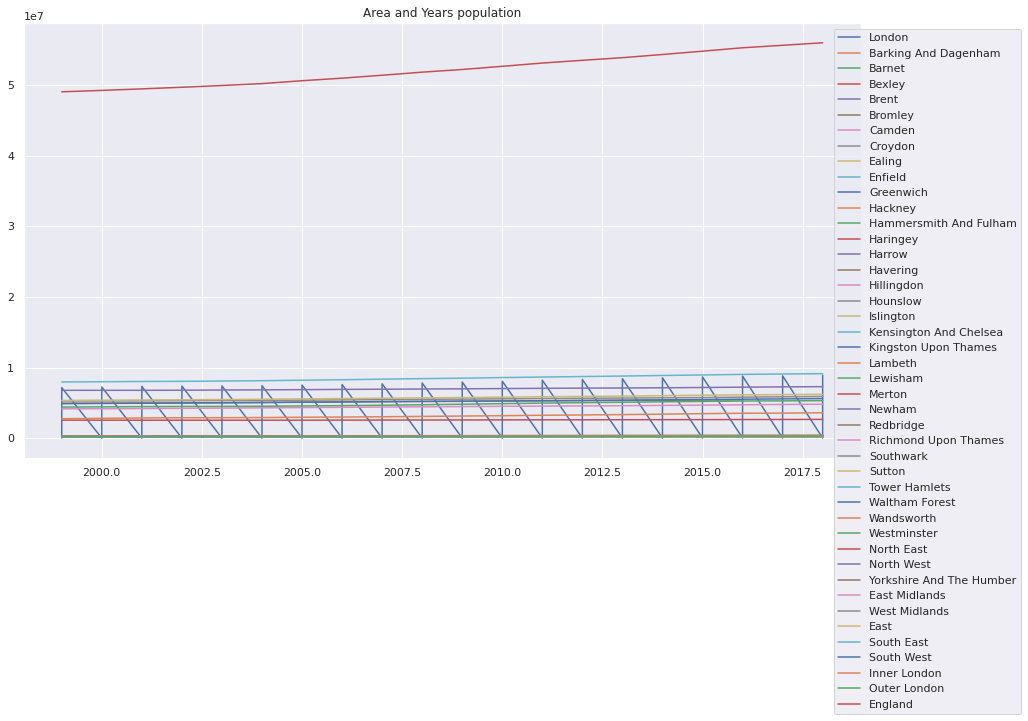

In [115]:
def area_plot(area_name):
    data = all_data_index.loc[area_name]
    plt.plot(data['population_size']) 


plt.figure(figsize = (15, 8))
areas = cleaned_data['area'].unique()
for area in areas:
    area_plot(area) 

plt.legend(areas,loc='upper center',bbox_to_anchor = (1.08, 1.0)) 
plt.title('Area and Years population')

  
plt.show()

# Conclusion

This project preseneted you to ways of working with large data sets from setting up the data, to grouping the data with pivot_table(), indexing the data with a set_index(), and visualizing pandas data using the matplotlib package.

# Reflection
**What skills have you demonstrated in completing this notebook?**

Your answer:

The skills i have demostrated in the project are : 

Use pandas's functions to:

remove duplicated data with .drop_duplicates(), 

Convert dates to date format with pd.to_datetime()

Replace string with another string with .str.replace('a string ','')
Capitalise the area values with .str.title() 

fill nodata field integer 0 with .fillna(0)

Conver a string type to integer with .astype(int) and to float with .astype(float)
  
drop row of population_size if any values is indexPopulation = df[df['population_size'] == 0].index  
df.drop(indexPopulation , inplace=True) 

remove mean_salary some shows '-' and '#' and Convert mean_salary values to float type
  df.loc[df['mean_salary'] == '-', 'mean_salary'] = 0
  df.loc[df['mean_salary'] == '#', 'mean_salary'] = 0
  
.dt.year
string slicing with .str[0:1] 
  df.loc[(df.code_name == 'E'),'code_name']='England'
  
  drop areas not England or drop code begin not with 'E'
  indexcodes = df[(df['code'].str[0:1] != 'E')].index
  df.drop(indexcodes , inplace=True) 
  
  
  Rename the columns
  df = df.rename(columns={'no_of_houses':'number_of_houses'})
sort by code and area with .sort_values(by = ["code", "area"])
  

Create pivot table with .pivot_table()

**What problems did you encounter and how did you solve them?**

Your answer:

The most tricky parts are processing dataset.

# Helpful references

Skipping rows when reading datasets:
https://www.geeksforgeeks.org/how-to-skip-rows-while-reading-csv-file-using-pandas/

Converting strings to dates:
https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

Dropping rows where data has a given value:
https://www.datasciencemadesimple.com/drop-delete-rows-conditions-python-pandas/
(see section Drop a row or observation by condition)

Convert a column of strings to a column of floats: https://datatofish.com/convert-string-to-float-dataframe/

Create a new column from data converted in an existing column:
https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/

Rename a column:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

Remove a column by name:
https://www.kite.com/python/answers/how-to-delete-columns-from-a-pandas-%60dataframe%60-by-column-name-in-python#:~:text=Use%20the%20del%20keyword%20to,the%20name%20column_name%20from%20DataFrame%20.

# Explore some other datasets
---

This [link](https://docs.google.com/document/d/1cijDOCDixsYu-Rr9pC8STPPXado3xoFpgBAZgdDTLHs/edit?usp=sharing) will take you to a list of some of the datasets we use during the Programming for Data course.

For this exercise, please choose a dataset to work with.

Use the code cell to play with the data.  Look at what data is included, where there is any null data, if there are any columns that need renaming, removing, new values calculated from them.

Form some ideas of what you might want to know from the data and use the techniques you have learned so far to show the answers to these.  You might do this by getting summary statistics, by sorting and showing parts of the dataset, by calculating new values, etc.